# Unsupervised Machine Learning - Selore Nigeria 

### Customer Segmentation Using Unsupervised ML (Clustering Unsing K-Means)

#### About Selore
- Selore Nigeria is a popular electronics retail chain in Nigeria, that specialises in the sale of mobile phones, tablets, laptops, and other related accessories.
- The company is also known for its after-sales support, including repairs and maintenance services, as well as trade-in options for old devices. With its numerous outlets nationwide, Selore Nigeria is a go-to destination for many Nigerians seeking to purchase mobile phones and related accessories.

#### Business Problem
- The retail company wants to understand the spending behaviour of its customers to target them with personalised marketing campaigns.
- They have collected data on customer demographics (age, gender) and spending habits (annual income, spending score) and want to segment their customers based on their spending behaviour.

#### Objectives and Goals
- The objective of this project is to build a customer segmentation model to help the retail company in developing targeted marketing strategies.
-The goal of this project is to segment customers based on their purchasing behaviour and demographic information.

#### K-means
- K-Means clustering is an unsupervised learning technique that is suitable for working with unlabelled data that lacks predifined categories or groups.
- The primary objective of this algorithm is to group similar data points together, with the number of groups determined by the value of K.
- The algorithm follows an iterative approach and assigns wach data point to one of the K groups based on the features that are provided.

### 1. Import Libraries

In [48]:
# Data Analysis Libraries
import pandas as pd
import numpy as np

# Data visualisation 
import seaborn as sns
import matplotlib.pyplot as plt

# ML and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings('ignore')

### 2. Load the Data

In [14]:
data = pd.read_csv(r"/Users/sunganani/Desktop/DATA SCIENCE 10ALYTICS/LEARNING MATERIALS/LMS LEARNING MATERIALS/WEEK 14 - MACHINE LEARNING (UNSUPERVISED ML)/Customers.csv")

In [50]:
# Check data has loaded

data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
data.shape

(200, 5)

### 3. Check Data is Clean

In [54]:
# Check for missing data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [56]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


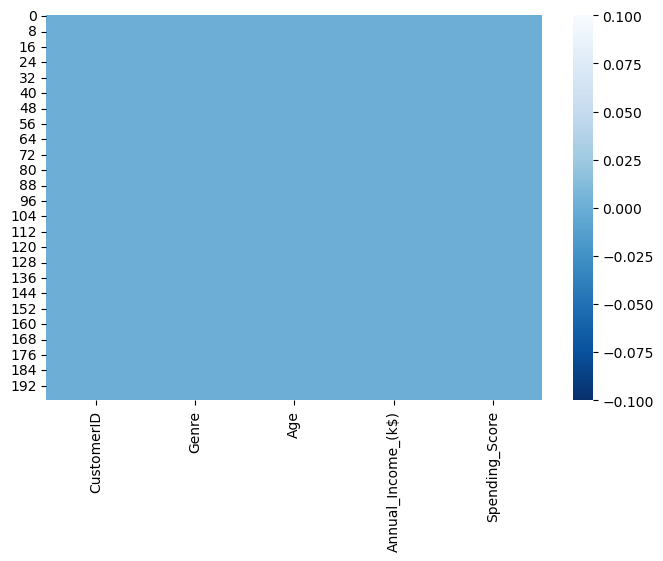

In [62]:
# Check for Missing Values
print(data.isnull().sum())

# Visualising Missing Data
plt.figure(figsize = (8,5))
sns.heatmap(data.isnull(),cbar=True, cmap='Blues_r');

### 4. Data Cleaning and Pre-Processing

In [66]:
# Check for Duplicates
print(data.duplicated().sum())

0


### 5.  Exploratory Data Analysis (EDA) 
- Univariate
- Bivariate
- Multivariate


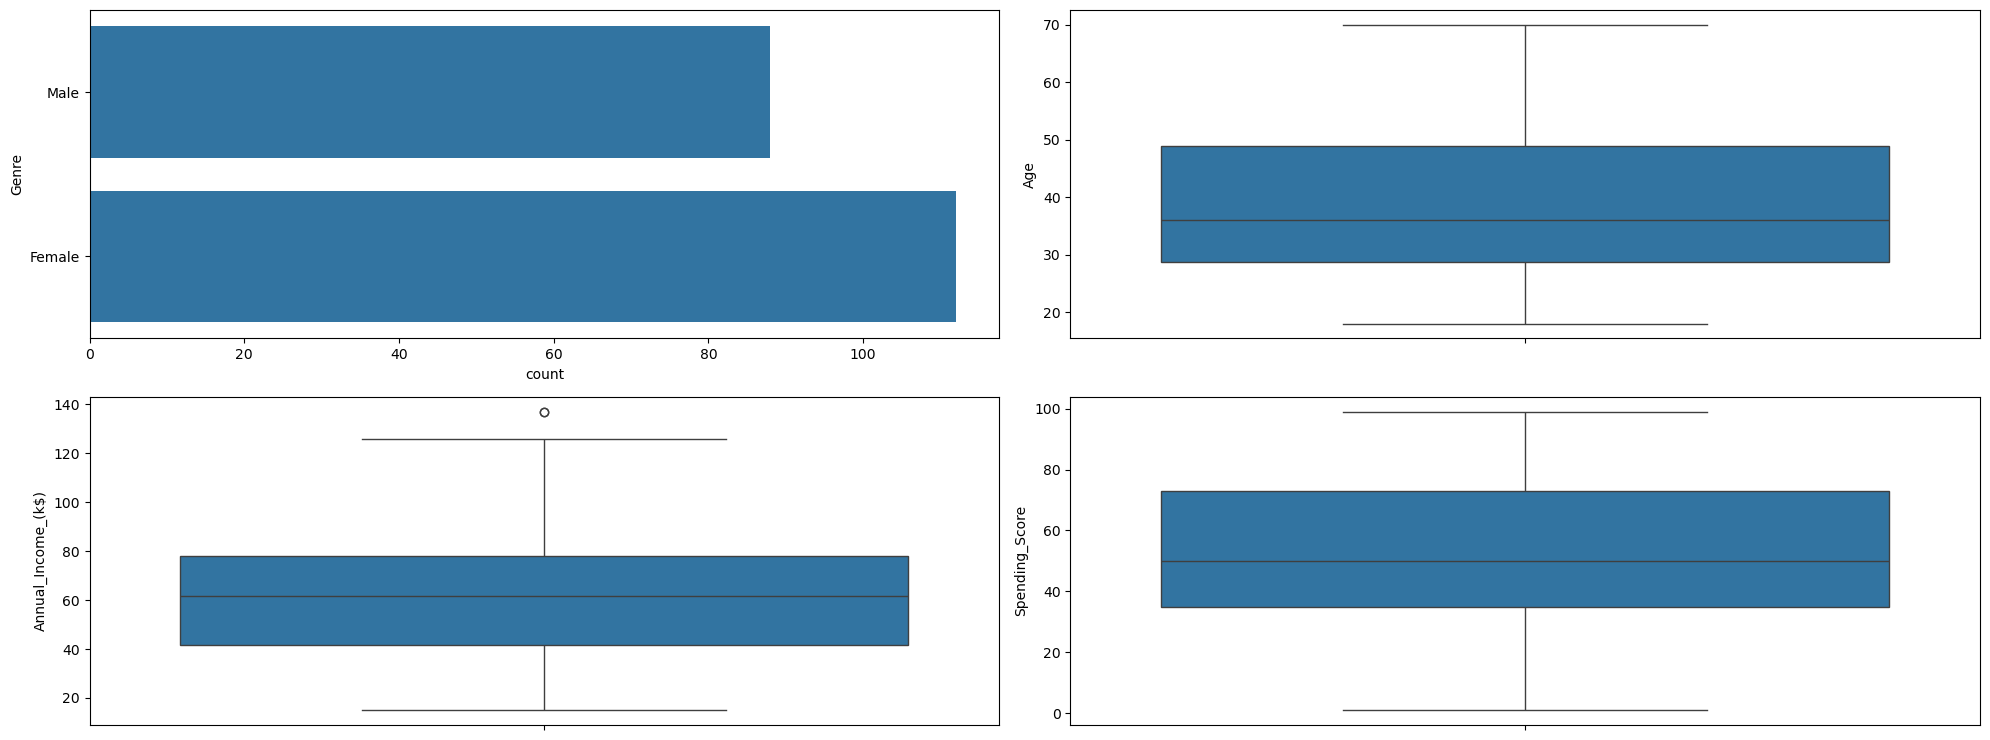

In [155]:
fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.countplot(data['Genre'], ax = axs[0,0])
plt2 = sns.boxplot(data['Age'], ax = axs[0,1])
plt3 = sns.boxplot(data['Annual_Income_(k$)'], ax = axs[1,0])
plt4 = sns.boxplot(data['Spending_Score'], ax = axs[1,1])

plt.tight_layout()

#### Observations
The figure displays initial exploratory data analysis visualizations for Selore Nigeria's customer data. The top-left plot, a horizontal bar chart, shows the count of male and female customers, indicating a slightly higher number of female customers in the dataset. The remaining boxplots illustrate the distribution of numerical features: age, annual income, and spending score. The age boxplot suggests a relatively wide range of customer ages without significant outliers. The annual income plot reveals an outlier with a very high income, while the spending score boxplot shows a fairly spread distribution with a potential outlier at the higher end. These initial visualizations provide insights into the basic characteristics of the customer base before further analysis.

### Unvariate Analysis

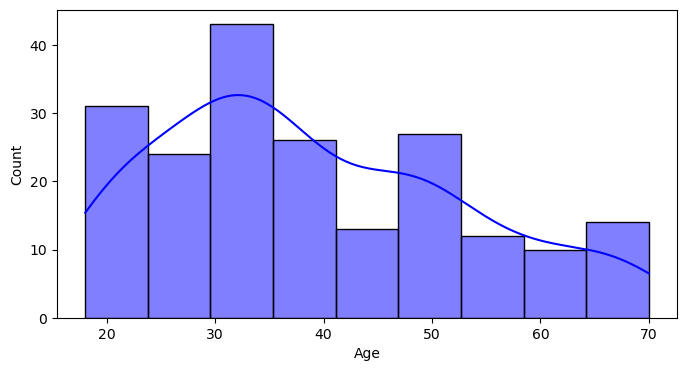

In [73]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Age"], color="blue", kde=True)    
plt.show()

#### Observations
This histogram visualises the age distribution of Selore Nigeria's 200 customers. The bars indicate the number of customers falling within specific age ranges, and the overlaid blue curve provides a smoothed estimate of the age distribution. The plot shows that the customer base has a noticeable concentration in the younger age groups, particularly in the late 20s to late 30s, with the highest count around the early 30s. There are also substantial numbers of customers in their early 20s and late 40s to early 50s. The distribution then tails off towards older age groups, indicating fewer customers in their 60s and 70s. This suggests that Selore Nigeria's primary customer demographic, based on this sample, leans towards younger to middle-aged individuals.

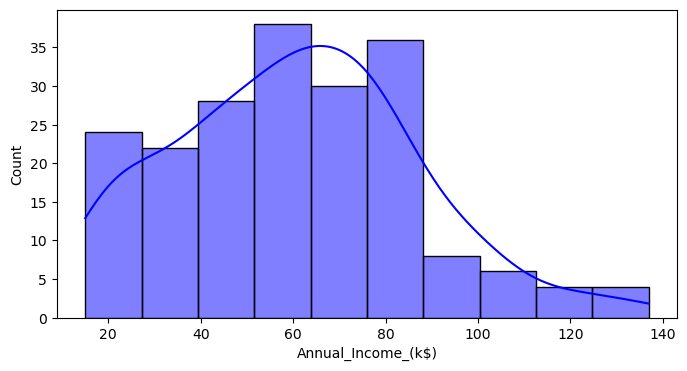

In [80]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Annual_Income_(k$)"], color="blue", kde=True)
plt.show()

#### Observations
This histogram illustrates the distribution of the annual income (in thousands of dollars) for the 200 customers of Selore Nigeria. The bars show the number of customers within different income brackets, and the blue curve provides a smoothed representation of this distribution. The plot indicates that a significant portion of the customers have annual incomes in the range of 50k to 80k, with the highest concentration around the 60k mark. There are also notable groups with incomes in the 20k-40k and 80k-100k ranges. The distribution shows a right skew, meaning there are fewer customers with very high annual incomes (above $100k). This income distribution provides valuable information for Selore Nigeria to understand the economic profile of their customer base.

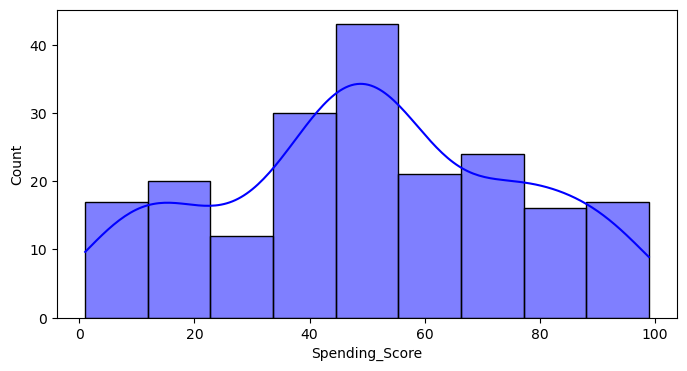

In [82]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Spending_Score"], color="blue", kde=True)
plt.show()

#### Observations
This histogram displays the distribution of the "Spending Score" assigned to Selore Nigeria's customers. The bars represent the number of customers within different ranges of spending scores, and the overlaid blue curve provides a smoothed view of this distribution. The plot reveals a somewhat multimodal distribution, suggesting the presence of distinct groups with varying spending tendencies. There's a notable peak in the spending score range of roughly 40 to 60, indicating a significant segment of customers with moderate spending habits. Additionally, there are smaller peaks around the 10-20 and 70-80 ranges, suggesting other customer segments with lower and higher spending scores, respectively. This distribution implies that Selore Nigeria's customer base exhibits diverse spending behaviors, which could be further explored through segmentation techniques as outlined in the project goals.

## Subplotting

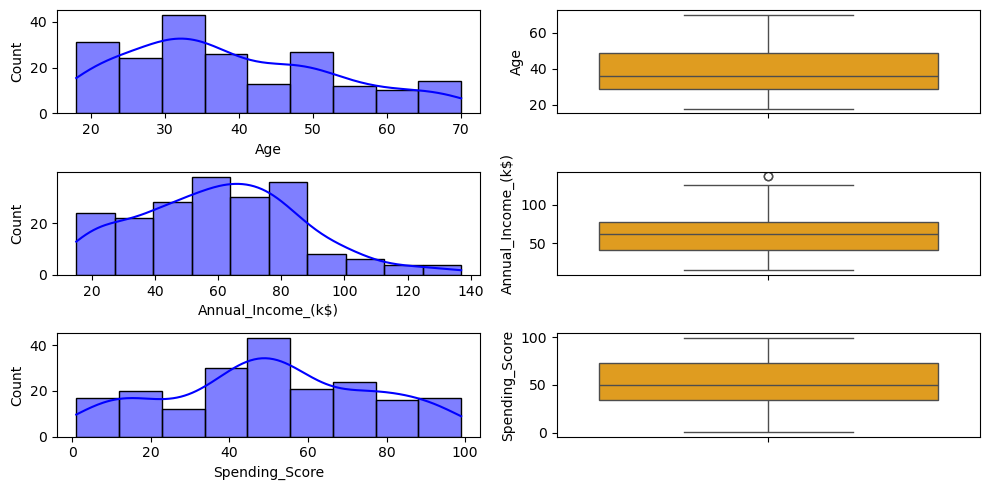

In [98]:
fig, position = plt.subplots(nrows=3, ncols=2, figsize=(10, 5))
sns.histplot(data["Age"], color="blue", kde=True, ax=position[0,0])
sns.boxplot(data["Age"], color="orange", ax=position[0,1])
sns.histplot(data["Annual_Income_(k$)"], color="blue", kde=True, ax=position[1,0])
sns.boxplot(data["Annual_Income_(k$)"], color="orange", ax=position[1,1])
sns.histplot(data["Spending_Score"], color="blue", kde=True, ax=position[2,0])
sns.boxplot(data["Spending_Score"], color="orange", ax=position[2,1])
plt.tight_layout()

plt.show()

#### Observations
This figure presents paired visualisations for the numerical features: Age, Annual Income (k$), and Spending Score. For each feature, a histogram with a Kernel Density Estimate (KDE) on the left shows the distribution of values, while a boxplot on the right summarises the central tendency, spread, and potential outliers. The age distribution appears somewhat skewed towards younger individuals. The annual income shows a right-skewed distribution with a notable outlier at a higher income level. The spending score exhibits a more varied distribution, possibly indicating different spending segments within the customer base.

#### Plot for all numerical data

In [119]:
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [115]:
len(data)

200

In [123]:
data.select_dtypes(include=['float', 'int'])

,CustomerID,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [125]:
numerical_columns = data.select_dtypes(include=['number']).columns

In [127]:
len(numerical_columns)

4

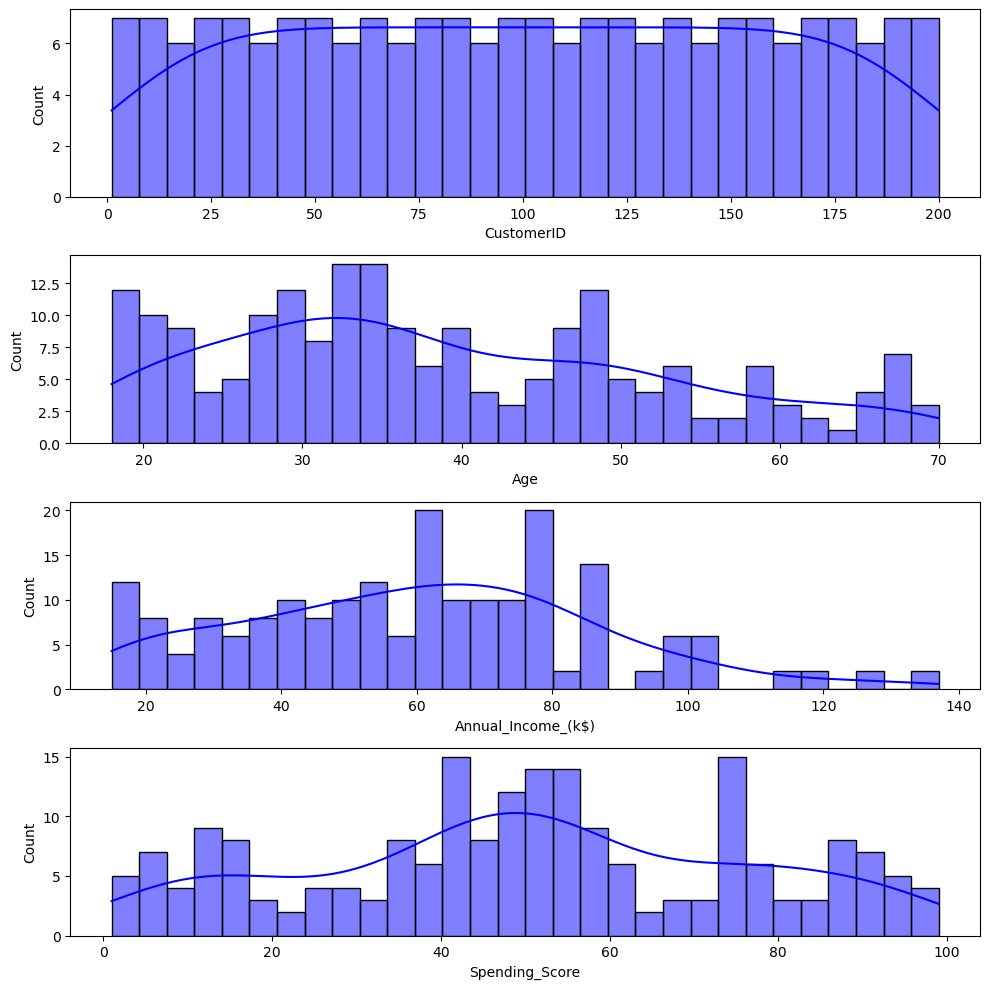

In [129]:
fig, position = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.histplot(data[column_name], color="blue", bins=30, kde=True, ax=position[index])

plt.tight_layout()
plt.show()

#### Observations
This figure displays the distributions of CustomerID, Age, Annual Income, and Spending Score using histograms with KDE curves. CustomerID shows a uniform distribution, as expected for unique identifiers. Age appears somewhat multimodal, suggesting different age clusters among customers. Annual Income is right-skewed, indicating more customers with lower to mid-range incomes. Spending Score also exhibits a multimodal distribution, potentially indicating distinct customer segments based on their spending behavior, which aligns with the project's goal of customer segmentation for targeted marketing.





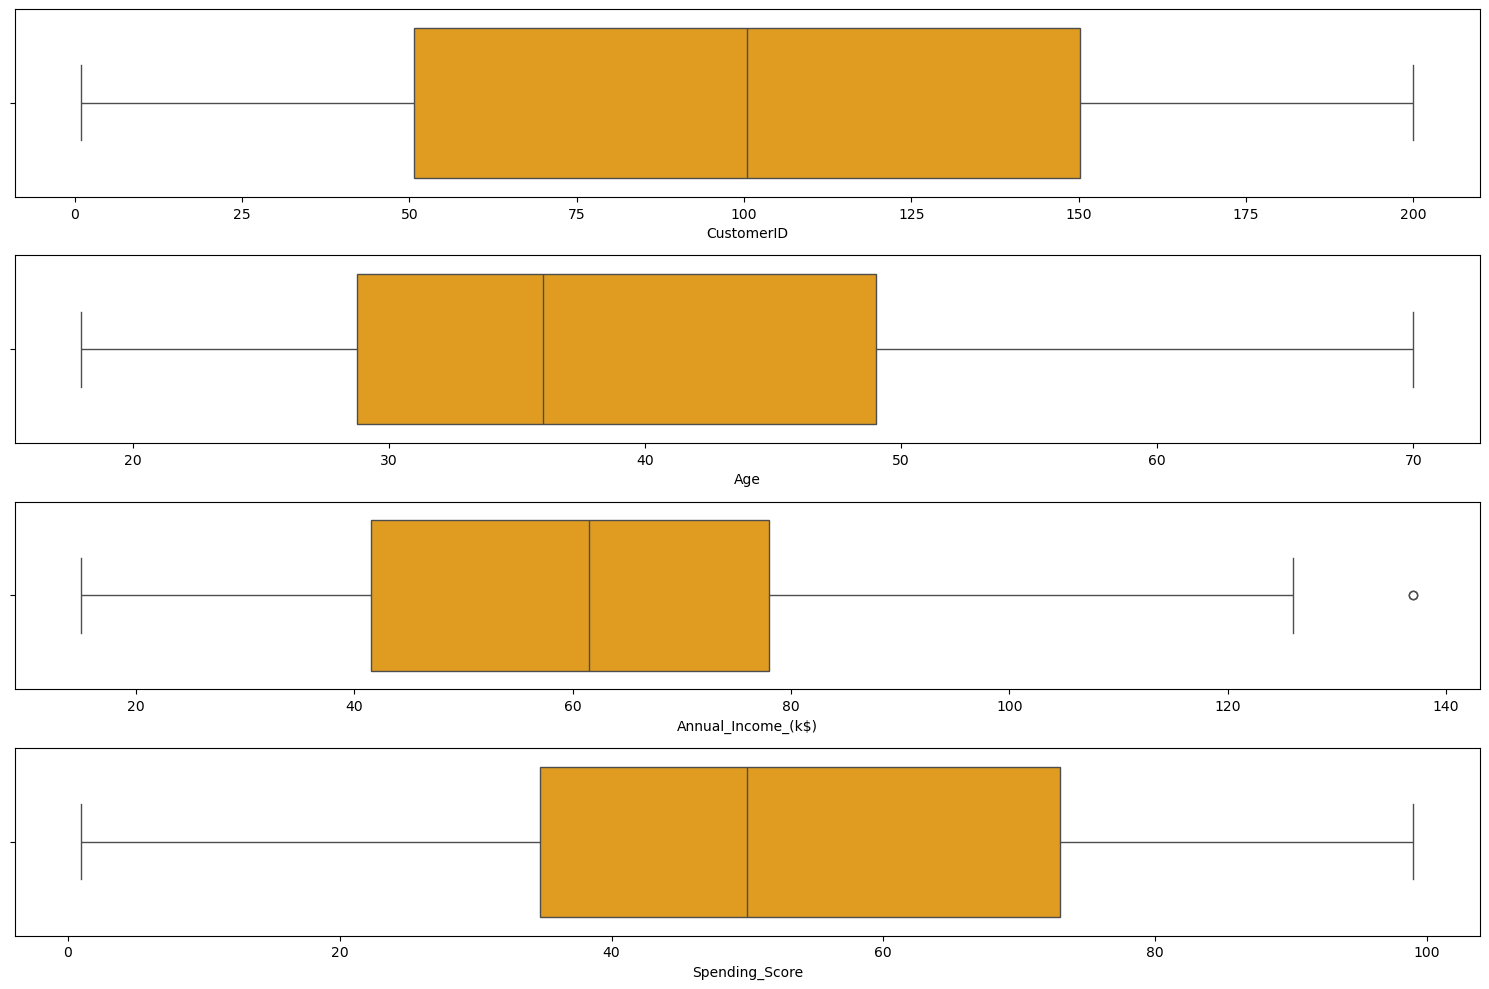

In [131]:
fig, position = plt.subplots(nrows=4, ncols=1, figsize=(15, 10))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.boxplot(x=data[column_name], color="orange", ax=position[index])

plt.tight_layout()
plt.show()

#### Observations
These boxplots summarise the distribution of CustomerID, Age, Annual Income, and Spending Score. CustomerID shows a uniform spread. Age is centered around the late 30s/early 40s. Annual Income is right-skewed with a high outlier. Spending Score has a median around 50 with a relatively even spread.

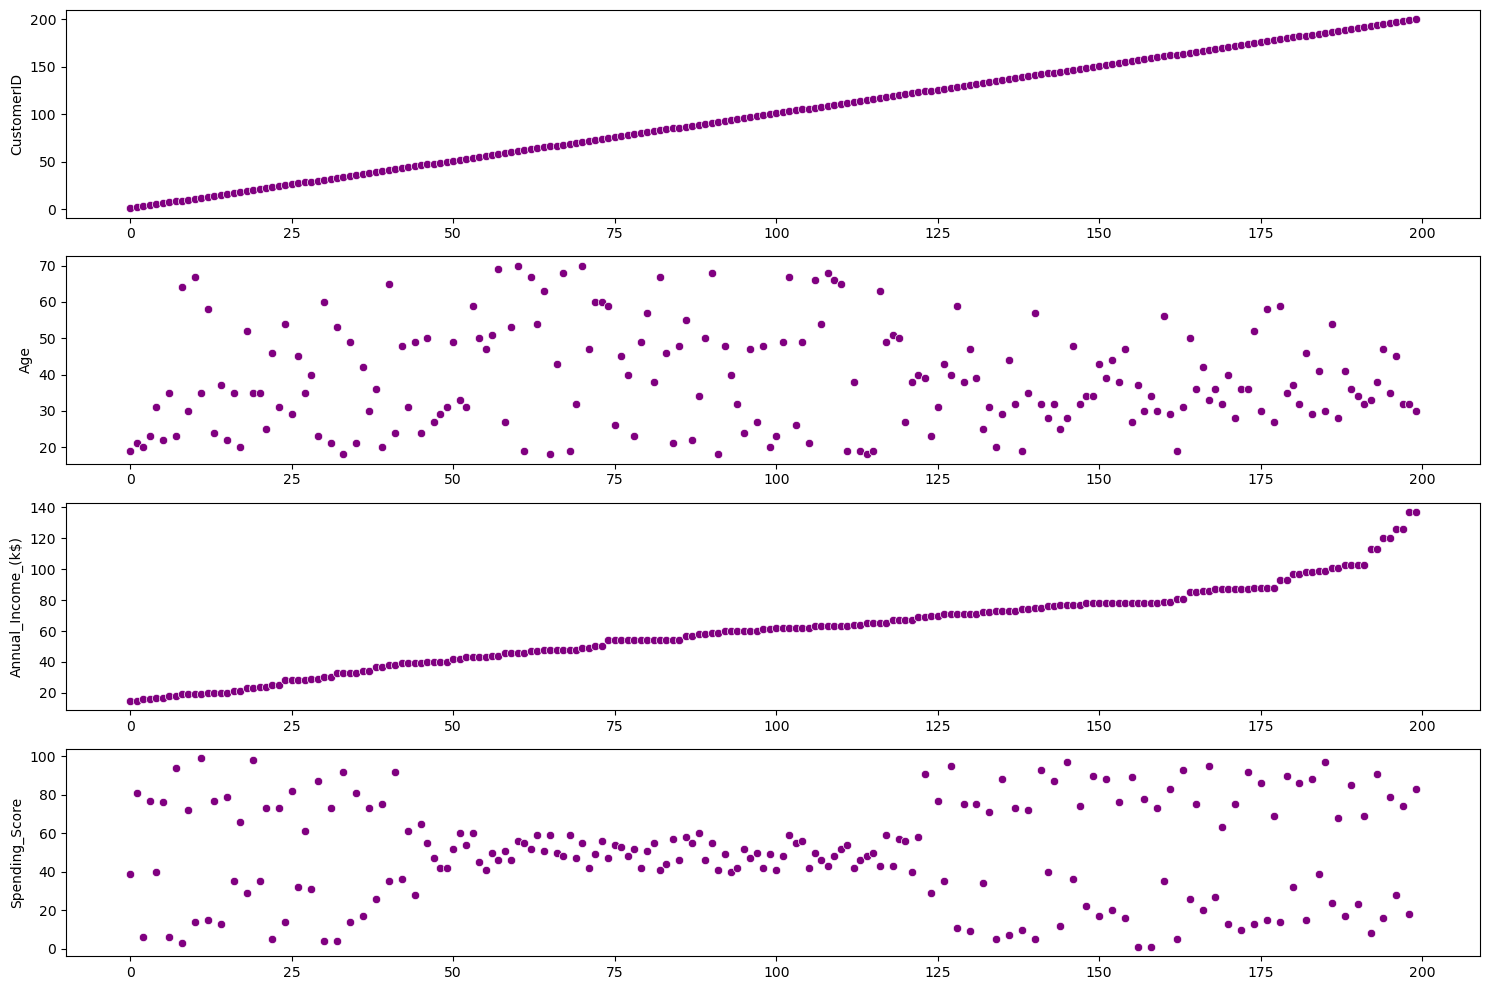

In [136]:
fig, position = plt.subplots(nrows=4, ncols=1, figsize=(15, 10))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.scatterplot(data[column_name], color="purple", ax=position[index])

plt.tight_layout()
plt.show()

#### Observations
- Age: The points are scattered randomly across ages, showing no specific trend. This suggests customers come from a wide range of age groups, fairly evenly.

- Annual Income: There's a gradual upward trend, but not perfectly linear — a few sudden jumps can be seen. Most customers earn between $20k and $100k, but some outliers (higher earners) are present.

- Spending Score: The points are very spread out randomly, without a clear trend. This shows spending score varies a lot among customers, independent of their order in the dataset.


### Bivirate Analysis

#### i. Age vs Spending Score

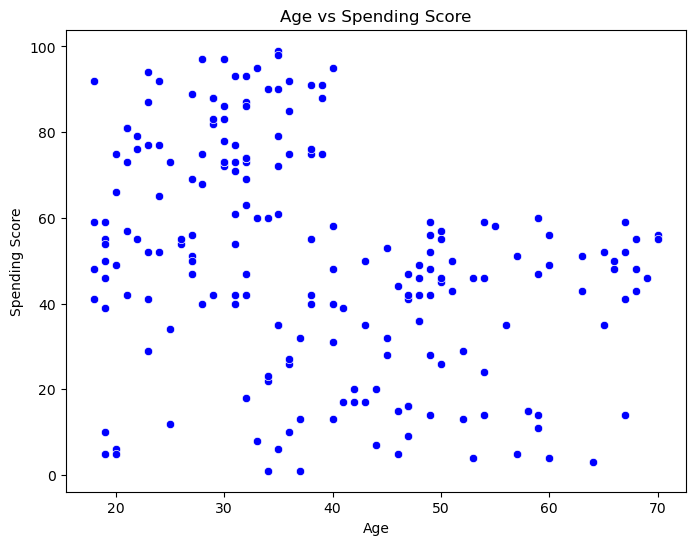

In [219]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Age', y='Spending_Score', color='blue')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

#### Observations
Based on the scatter plot titled "Age vs Spending Score," there doesn't appear to be a strong linear relationship between a person's age and their spending score. We see individuals across all age ranges exhibiting a wide variety of spending scores, with clusters of higher spending scores concentrated in the younger to middle-aged groups (roughly 25-40 years old), while lower spending scores are more dispersed across all ages.

#### ii. Annual Income vs Spending Score scatter plot

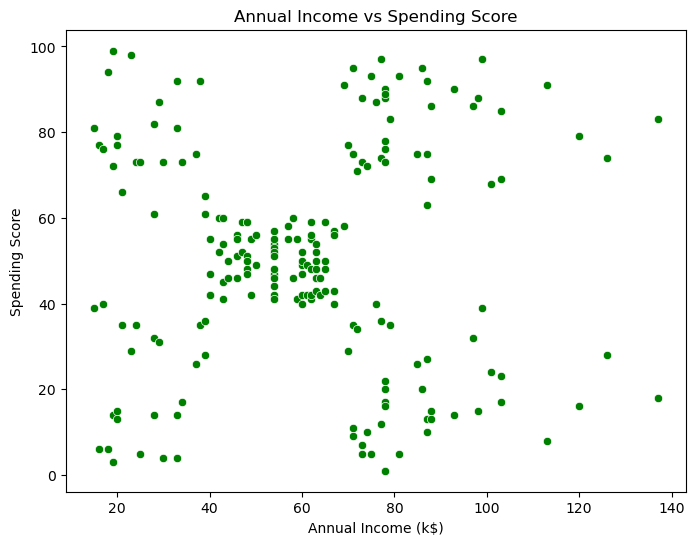

In [226]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Annual_Income_(k$)', y='Spending_Score', color='green')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

#### Observations
It appears there's a cluster of individuals with moderate annual incomes (roughly between 40k and 70k) who exhibit a wide range of spending scores, including some of the highest scores observed. On the other hand, individuals with either very low or very high annual incomes tend to have lower to moderate spending scores. This could indicate different spending behaviors based on income levels, with a middle-income segment showing more variability in their spending habits.

#### iii. Correlation 
to see relationships between all numerical columns

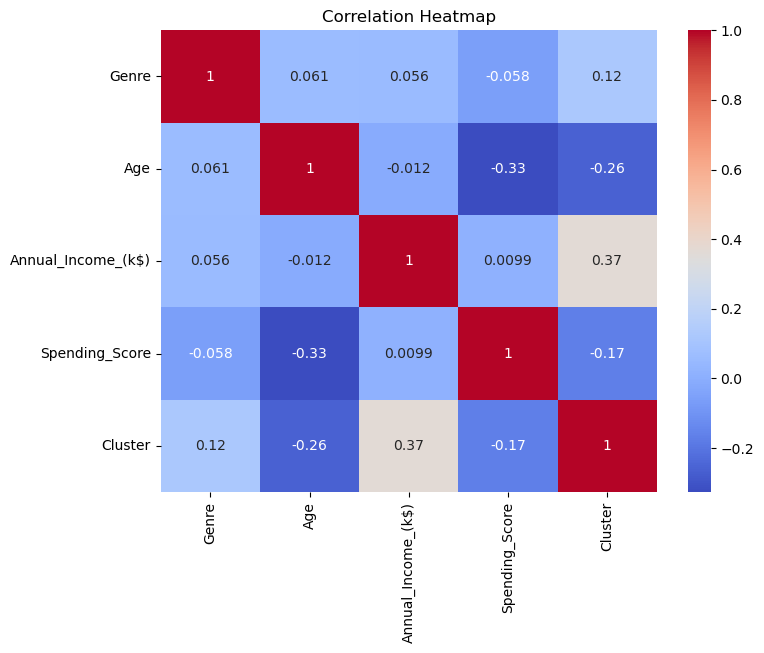

In [236]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Observations
The correlation heatmap displays the linear relationships between numerical variables using color intensity, with red indicating positive and blue indicating negative correlations. Notably, "Annual Income" shows a near-zero correlation with "Spending Score," while "Spending Score" has a moderate negative correlation with "Cluster," and "Age" has a moderate positive correlation with "Cluster."

#### Detect Outliers with Boxplots

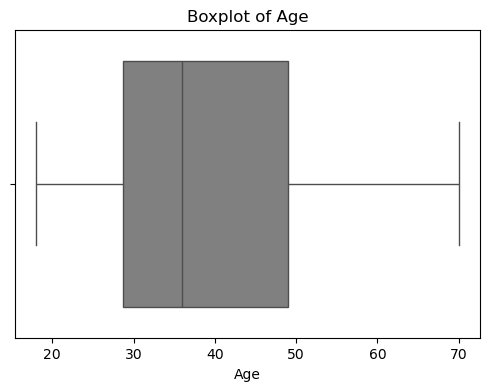

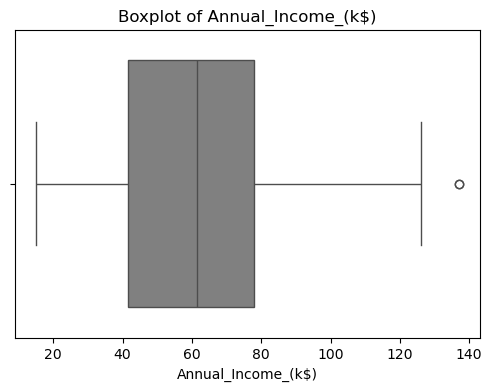

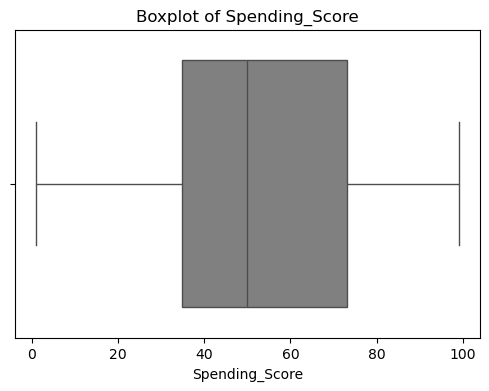

In [254]:
numerical_columns = ['Age', 'Annual_Income_(k$)', 'Spending_Score']

for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col], color='grey')
    plt.title(f'Boxplot of {col}')
    plt.show()

#### Observations
The boxplot for Annual Income shows a clear outlier on the higher end, suggesting at least one individual with a significantly higher income than the majority. The boxplots for "Age" and "Spending Score" do not show any obvious outliers, as all data points appear to fall within the expected range as indicated.

### 6. MACHINE LEARNING
- Label encoder helps us to change categorical data into numerical data (ML DOES NOT RECOGNISE CATEGORICAL DATA)



In [163]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # Method initialisation

# Looping for columns except Survived (# This will look at ALL the columns and change the Columnd whose datatype is an object, it will change it into a number e.g. 1= male; 0=female)
for c in data.columns[1:]: 
    if (data[c].dtype=='object'):
        data[c] = encoder.fit_transform(data[c])
    else:
        data[c] = data[c]

data.head(2)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81


In [173]:
data.columns[1:]

Index(['Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [175]:
# Remove Customer ID (ALWAYS remove unique identifiers)
data.drop('CustomerID', axis=1, inplace=True)
data.head(2)

KeyError: "['CustomerID'] not found in axis"

After applying the K-means clustering algorithm, we can determine the optimal number of clusters by using the Elbow Method. This method involves plotting the within Cluster Sum of Squares (WCSS) against the number of clusters (K) and selecting the value of K where the rate of decrease in WCSS slows down significantly. In the graph below, we can observe that after K=3, there is no significant decrease in WCSS, indicating that 3 is the optimal number of clusters in this case. Although the optimal value of k may not always be apparent from the graph, with practice, it becomes easier to identify the elbow point where the rate of decrease in WCSS slows down significantly.



In [208]:
# The graph below shows The Elbow Method 
# The point where the graph dipps 'Elbow point' (optimum) which is the cluster number you need to use

#### Determine Optimal Number of Clusters

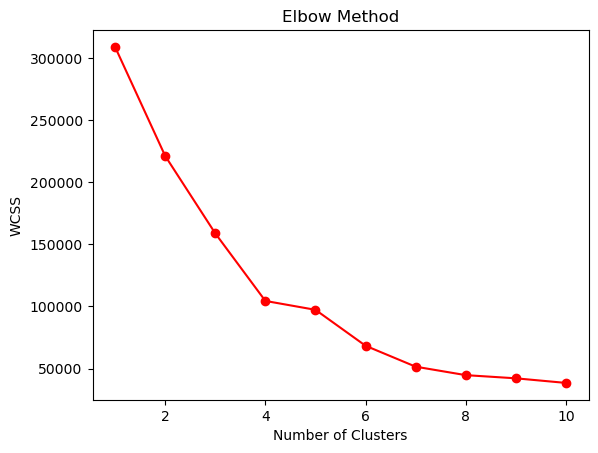

In [190]:
wcss = []
for i in range(1, 11): (#1 to 11 is actually 1 to 10 because it doesnt take into consideration the number it stops at)
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) (# i in the n_clusters=i; the algorithm will replace the i witht the value from 1 to 10 and test to give us the optimal number)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Observations
- The optimal point for this data set is 4 

- In the above code block, the objective is to determine the optimal number of clusters for the K-means clustering algorithm. The optimal number of clusters is important because it affects the quality of the clustering results.

- The within-cluster sum of squares (WCSS) is used to determine the optimal number of clusters. WCSS measures the sum of the squared distance between each point and its corresponding cluster centroid. The idea is to minimize the WCSS by increasing the number of clusters until a certain point where the WCSS starts to decrease at a slower rate.

- The for loop iterates over a range of values from 1 to 10, creating a KMeans clustering model for each value of i. The 'init' parameter is set to 'k-means++', which is a method to initialize the centroids in a smart way to speed up convergence. The 'random_state' parameter is set to 42 for reproducibility. The 'fit' method is used to fit the KMeans model to the data, and the inertia (WCSS) is computed and appended to the 'woss' list.

- Finally, a plot is created with the number of clusters on the x-axis and the WCSS on the y-axis. The plot is called the 'Elbow Method' plot because it looks like an elbow where the optimal number of clusters is the point where the WCSS starts to decrease at a slower rate. In this case, the plot shows that the optimal number of clusters is 5, as the WCSS starts to decrease at a slower rate beyond that point.


#### Clustering

In [198]:
# Fit K-means clustering model
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data)

# Add Cluster labels to data
data['Cluster']=kmeans.labels_

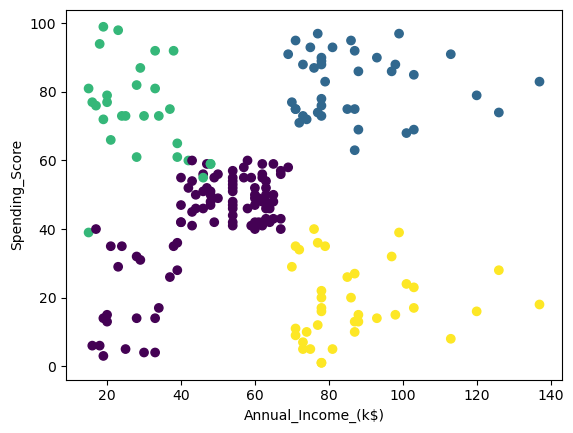

0.4061130710962918

In [202]:
# Visualise cluster results
plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c=data['Cluster'], label='Centroids')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

# Calculate Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_score(data, kmeans.labels_)

### Observations and Recommendations

#### Cluster 1 (Blue): High Income, High Spending
- Customer Profile: This group includes affluent customers who frequently purchase products with high spending habits. They likely prefer premium-quality products and exclusive services.

- Behavior Analysis: These customers are loyal and willing to invest in products or services that meet their expectations for luxury and convenience. They might also have brand loyalty if they've experienced superior customer service.

- Marketing Strategies:

    - Offer VIP loyalty programs, personalised recommendations, and exclusive early access to new products.

    - Invest in premium advertising channels, like luxury lifestyle platforms, to appeal to their tastes.

    - Use data analytics to identify their preferences and tailor campaigns that focus on exceptional quality or bespoke experiences.

#### Cluster 2 (Purple): Low Income, Low Spending
- Customer Profile: Budget-conscious individuals who exhibit minimal spending. They might prioritise basic needs and are less likely to indulge in discretionary purchases.

- Behavior Analysis: They are value-driven and respond positively to discounts, promotions, and affordable pricing. This group might avoid premium or luxury items unless heavily discounted.

- Marketing Strategies:

    - Focus on seasonal sales and low-cost bundles to encourage purchasing.
    - Create campaigns emphasising value for money—e.g., highlighting durability, utility, or cost-saving aspects of products.
    - Engage with this group via mass-market advertising, such as social media channels with low production costs.

#### Cluster 3 (Green): Low Income, High Spending
- Customer Profile: This group represents individuals who spend a significant portion of their income on select products. They might seek status symbols or prioritise specific categories over others.
  
- Behavior Analysis: Their spending habits indicate aspirational purchasing behavior—valuing products that enhance their self-image or lifestyle. They may actively seek deals to indulge without compromising financial stability.

- Marketing Strategies:

    - Design special promotions with limited-time offers that capitalize on their aspirational tendencies.
    - Develop campaigns targeting lifestyle enhancement, showcasing how products can improve their daily lives or social standing.
    - Incorporate installment payment plans for high-value products to make luxury more accessible.

#### Cluster 4 (Yellow): High Income, Low Spending
- Customer Profile: Wealthy individuals who are cautious with their spending habits. They might prioritize saving and investing over consumption or selectively choose products with high perceived value.

- Behavior Analysis: While financially capable, these customers require strong justification for spending. They might prefer products or services that align with their values, such as sustainability, or products that offer long-term benefits.

- Marketing Strategies:

    - Highlight long-term benefits, such as durability, warranty, and reliability, to justify their purchasing decisions.
    - Incorporate corporate social responsibility (CSR) elements into campaigns, like promoting sustainable or ethical practices.
    - Offer exclusive trials or guarantees to encourage cautious buyers to take the plunge.

#### General Recommendations
- Combine segmentation insights with multi-channel marketing to ensure each cluster is targeted via their preferred platforms.

- Regularly evaluate customer feedback from each segment to refine strategies and improve engagement.

- Consider cross-selling opportunities by designing tailored offers that appeal to adjacent clusters (e.g., Cluster 4 and Cluster 1).